# Yulu - Business case:
By: Sumedha Singh Rathor

Problem Statement :

* Yulu has recently suffered considerable dips in its revenues. They want to understand the factors on which the demand for these shared electric cycles depends. 
* Specifically the factors affecting the demand for these shared electric cycles in the Indian market.

In [1]:
# Import necessary libraries

# Data manuipulation
import pandas as pd
import numpy as np
from datetime import datetime

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bike_sharing.csv', parse_dates=['datetime'])
print(data.shape)
data.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Column Informations
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:<br>
            1: Clear, Few clouds, partly cloudy, partly cloudy<br>
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

In [3]:
# Lets see the data type of each column and the values it holds.
print("Total null entries in respective columns are : \n", data.isnull().sum())

Total null entries in respective columns are : 
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


Zero null entries in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


All columns seems to be haveing correct daya type. We will also investigate the individual datatypes as and when needed.


In [5]:
# Unique entries in each column
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

Except for `season`, `holiday`, `workingday` and `weather`, all other columns hold numerican/ continuous data

Also note, that `count` is target variable and the analysis is to be centered around this.

In [6]:
# duplicate entries
data.duplicated().sum()

0

Zero duplicate entries in the dataset.

## Basic EDA

Lets make some plots to figure out basic details about each variable
<br>
Before proceeding forward, let's extract date, month and year from date.

In [7]:
data['date'] = pd.to_datetime(data['datetime'].dt.date)
data['day_name'] = data['datetime'].dt.day_name()
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['hour'] = data['datetime'].dt.hour

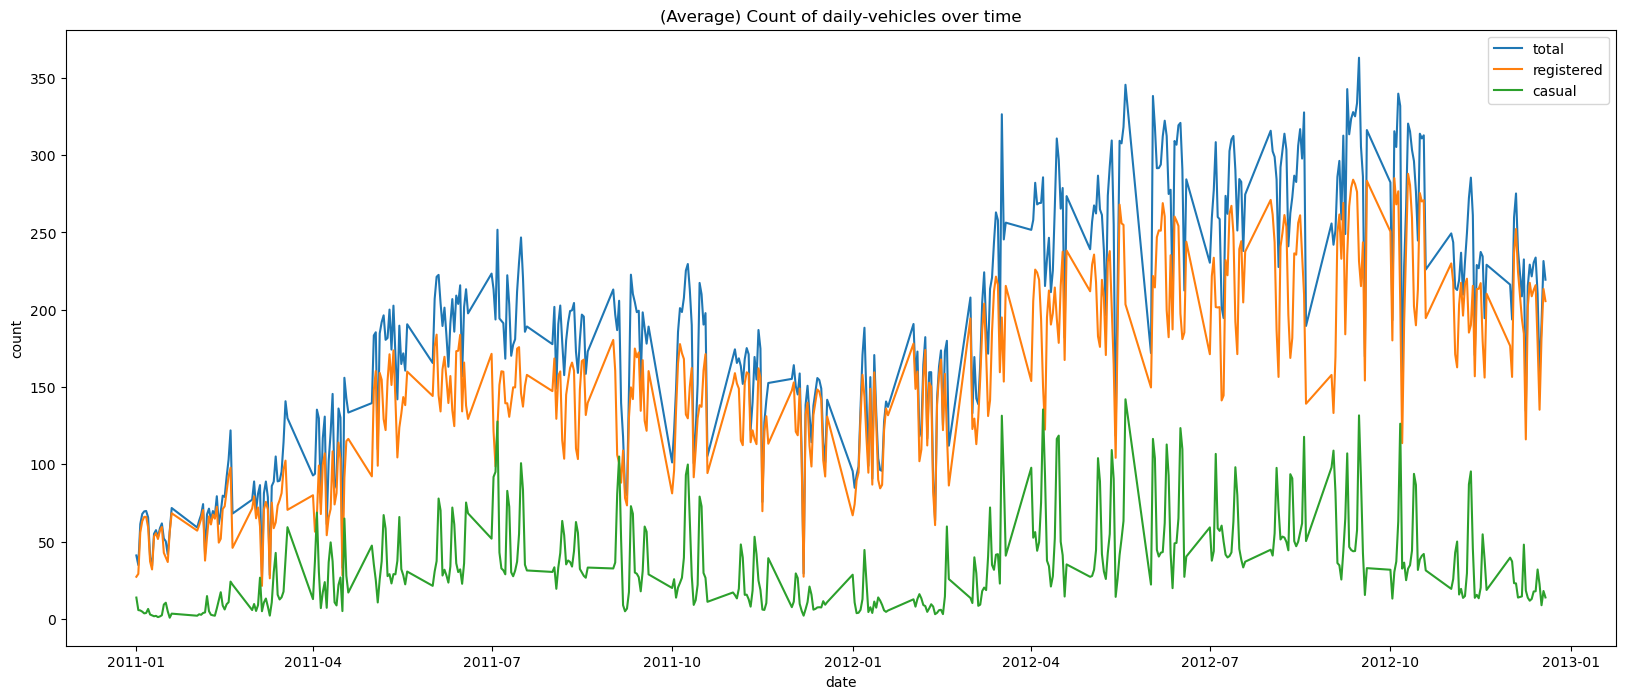

In [8]:
# Plot 1
plt.figure(figsize=(20,8))
sns.lineplot(data.groupby('date')[['count']].mean(), x='date', y='count', label='total')
sns.lineplot(data.groupby('date')[['registered']].mean(), x='date', y='registered', label='registered')
sns.lineplot(data.groupby('date')[['casual']].mean(), x='date', y='casual', label='casual')
plt.title('(Average) Count of daily-vehicles over time');

Although the overall trend seems to be upwards specifically Jan-2012 onwards, but we can notice the gradual decrease in no. of vehicles (total and registered) after Sept-2012

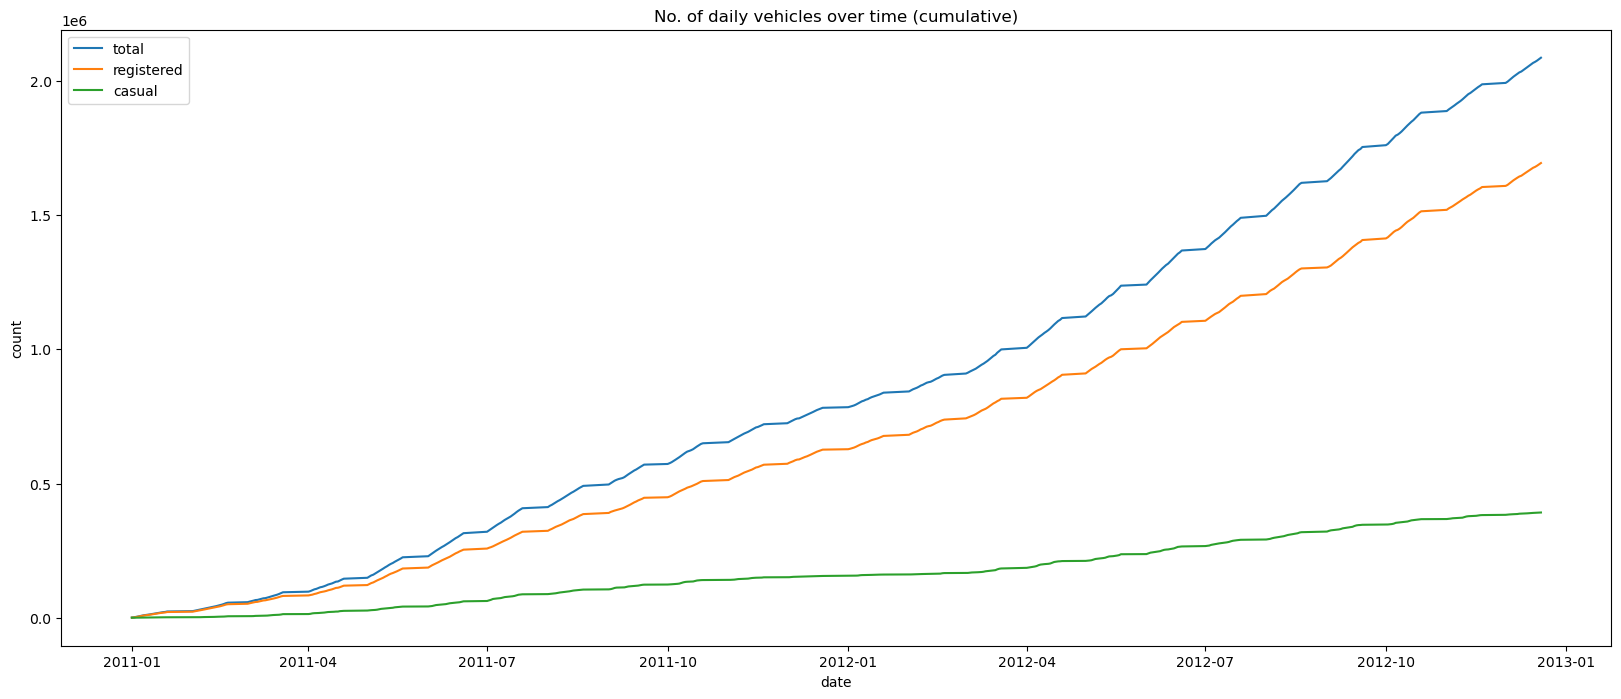

In [9]:
# Plot 2
plt.figure(figsize=(20,8))
sns.lineplot(data.groupby('date')[['count']].sum().cumsum(), x='date', y='count', label='total')
sns.lineplot(data.groupby('date')[['registered']].sum().cumsum(), x='date', y='registered', label='registered')
sns.lineplot(data.groupby('date')[['casual']].sum().cumsum(), x='date', y='casual', label='casual')
plt.title('No. of daily vehicles over time (cumulative)');

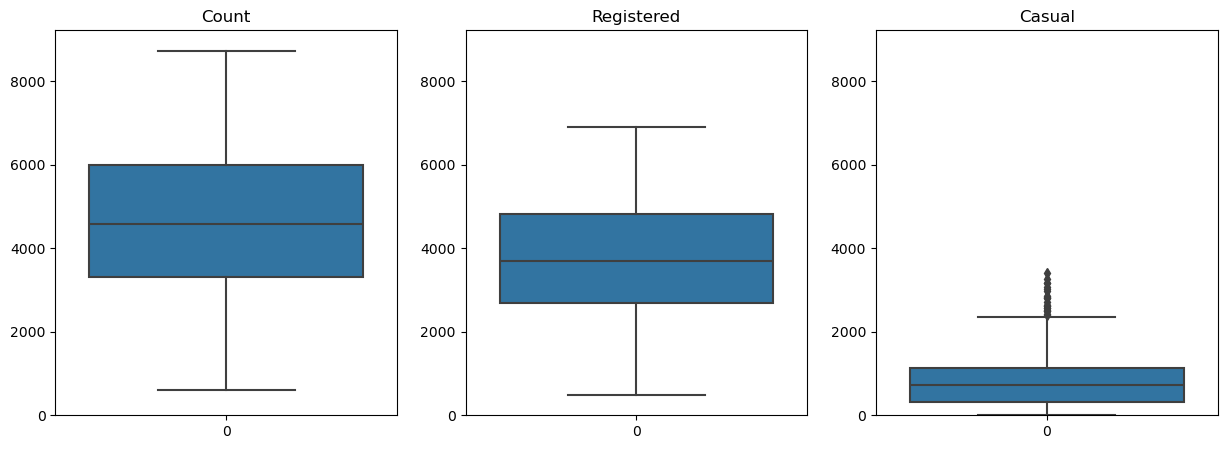

In [88]:
# checking for outliers
def plot_1():
    df_1 = data.groupby(by = 'date')['count'].sum()
    df_2 = data.groupby(by = 'date')['registered'].sum()
    df_3 = data.groupby(by = 'date')['casual'].sum()
    
    max_ =max([max(df_1),max(df_2),max(df_3)])+500
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.boxplot(df_1)
    plt.ylim(0,max_)
    plt.title('Count')

    plt.subplot(1,3,2)
    sns.boxplot(df_2)
    plt.ylim(0,max_)
    plt.title('Registered')

    plt.subplot(1,3,3)
    sns.boxplot(df_3)
    plt.ylim(0,max_)
    plt.title('Casual')

plot_1()

* |We see lots of outliers in `casual` vehicale count. 
* Since we are only concerened with the totl count, there is no need to handle these outliers.
    * Handling these outliers will mean we need to drop these records, this will lead to loss of information.

### 2. Season and count (count of total rental)

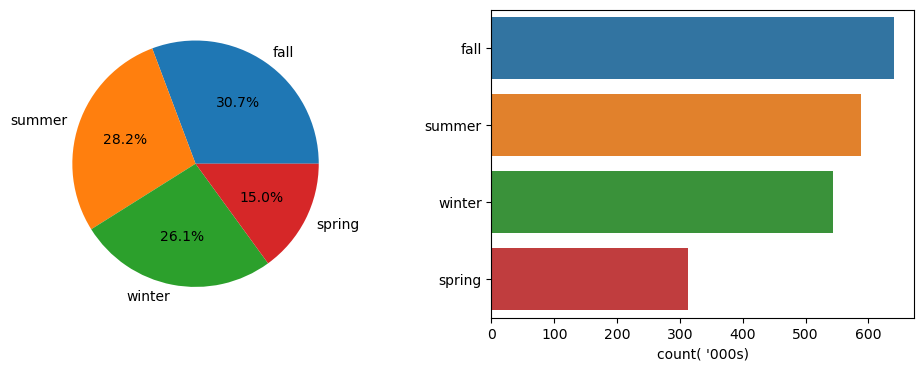

In [11]:
def plot_2():
    df = data.groupby(by='season')['count'].sum().sort_values(ascending=False).reset_index()
    df['season'] = df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.pie(x = df['count'], labels = df['season'], 
            autopct = lambda pct: f'{pct:.1f}%')
    
    plt.subplot(1,2,2)
    sns.barplot(y=df['season'], x=np.round(df['count']/1_000, 1), orient='h')
    plt.xlabel("count( '000s)")
    plt.ylabel(None)

plot_2()

### 3. Holiday/Workingday and count (count of total rental)

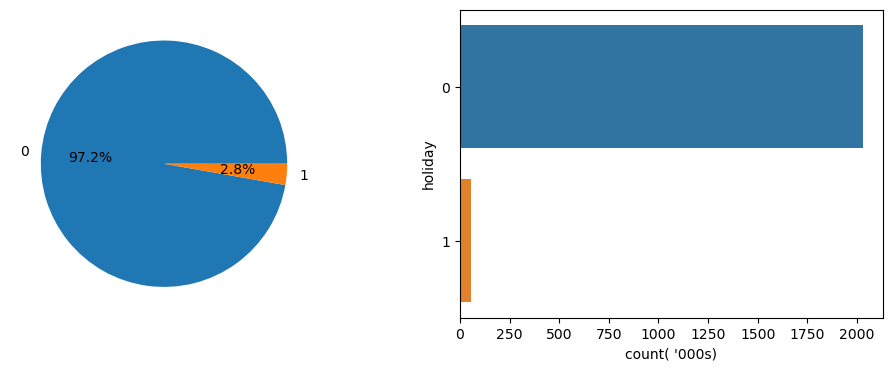

In [12]:
def plot_3a():
    df = data.groupby(by='holiday')['count'].sum().sort_index(ascending=True).reset_index()
    # df['holiday'] = df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.pie(x = df['count'], labels = df['holiday'], 
            autopct = lambda pct: f'{pct:.1f}%')
    
    plt.subplot(1,2,2)
    sns.barplot(y=df['holiday'], x=np.round(df['count']/1_000, 1), orient='h')
    plt.xlabel("count( '000s)")
    # plt.ylabel(None)

plot_3a()

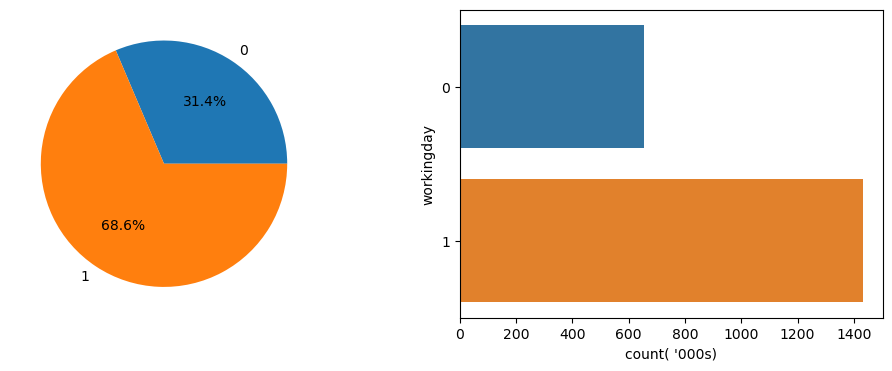

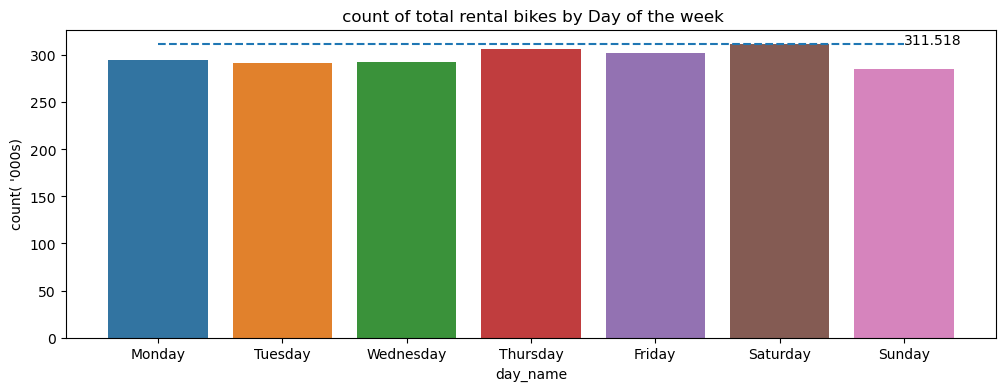

In [13]:
def plot_3b():
    df = data.groupby(by='workingday')['count'].sum().sort_index(ascending=True).reset_index()
    # df['workingday'] = df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.pie(x = df['count'], labels = df['workingday'], 
            autopct = lambda pct: f'{pct:.1f}%')
    
    plt.subplot(1,2,2)
    sns.barplot(y=df['workingday'], x=np.round(df['count']/1_000, 1), orient='h')
    plt.xlabel("count( '000s)")
    # plt.ylabel(None)

    # plt.subplot(1,2,2)
    df_weekday = data.groupby(by='day_name')['count'].sum().reset_index()
    custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_weekday['day_name'] = pd.Categorical(df_weekday['day_name'], categories=custom_order, ordered=True)
    df_weekday = df_weekday.sort_values(by='day_name').reset_index(drop=True)

    plt.figure(figsize=(12,4))
    sns.barplot(x=df_weekday['day_name'], y=np.round(df_weekday['count']/1_000, 1))
    plt.ylabel("count( '000s)")
    plt.title(' count of total rental bikes by Day of the week')
    plt.hlines(y=max(df_weekday['count'])/1_000, xmin=0, xmax=len(custom_order)-1, linestyles='--')
    plt.text(x=len(custom_order)-1, y = max(df_weekday['count'])/1_000, s=max(df_weekday['count'])/1_000)

plot_3b()

* Looking at the bike ride solely on the weekend and week days might lead one to believe that there is a higher demand during weekdays over weekends.
* Looking at the bike ride on individual day actually shows a very different picture.
    * The maximum number of bike rides have been observed on saturday itsef.
    * This is quite interesting because its counter-intutive to the weekedn/weekday distribution.
        * The main reason is weekend consists of just 2 days whereas weekday consist of 5 days, so the skew is definitely expected.

**we will test this claim in when we do hypothesis testing.**

### **Number of bikes across months**

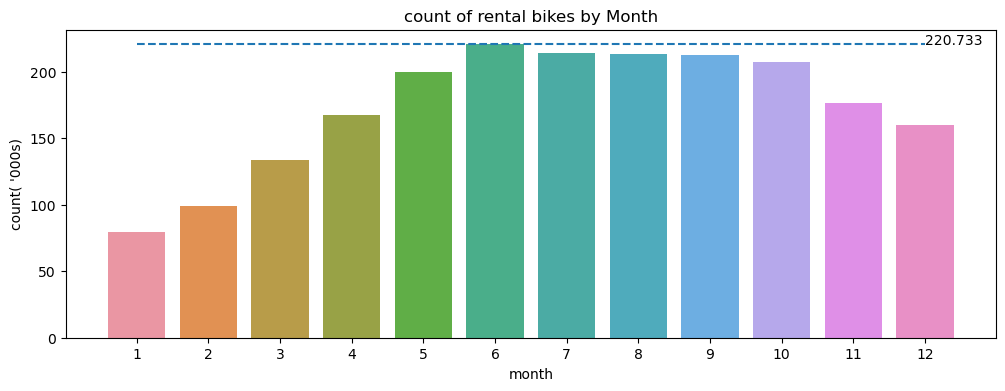

In [82]:
def plot_3c():
    df = data.groupby(by='month')['count'].sum().sort_index(ascending=True).reset_index()
    # df['workingday'] = df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

    plt.figure(figsize=(12,4))
    sns.barplot(x=df['month'], y=df['count']/1_000)
    plt.ylabel("count( '000s)")
    plt.title('count of rental bikes by Month')
    plt.hlines(y=max(df['count'])/1_000, xmin=0, xmax=len(df['month'])-1, linestyles='--')
    plt.text(x=len(df['month'])-1, y = max(df['count'])/1_000, s=max(df['count'])/1_000)

plot_3c()

There seems to be a pattern in demand with month of the year.
* The demand seems to be lower in Dec, Jan and Feb.
* The demand is higher during Juune till Oct.

**We will use appropriate test to confirm this claima and actually check whether any relation between deman and month exist or not**

### 4. Weather/temp/atemp vs count (count of total rental)

weather <br>
1: Clear, Few clouds, partly cloudy, partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>

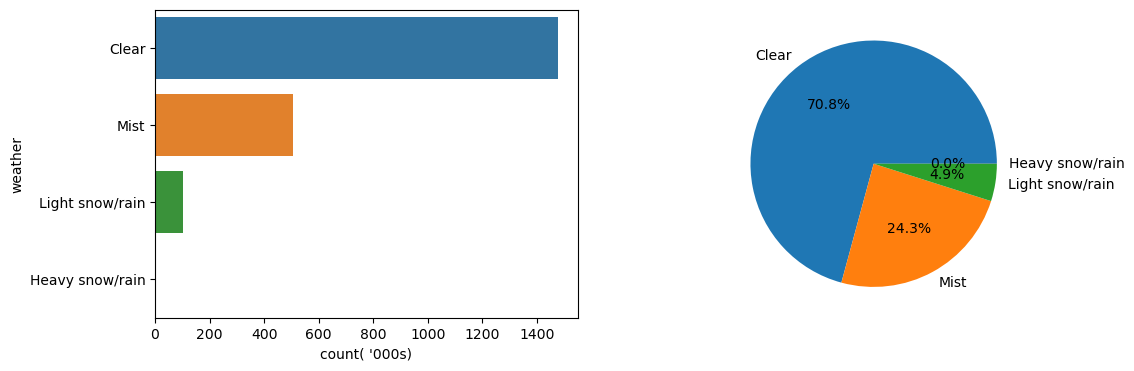

In [14]:
def plot_4a():
    df = data.groupby(by='weather')['count'].sum().sort_index(ascending=True).reset_index()
    df['weather'] = df['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light snow/rain', 4: 'Heavy snow/rain'})

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,2)
    plt.pie(x = df['count'], labels = df['weather'], 
            autopct = lambda pct: f'{pct:.1f}%')
    
    plt.subplot(1,2,1)
    sns.barplot(y=df['weather'], x=np.round(df['count']/1_000, 1), orient='h')
    plt.xlabel("count( '000s)")
    # plt.ylabel(None)

plot_4a()

Demand is zero in Heavy snowy and Light snow weather.
* We can get an indea that there is some relation beteen bike bookins and weather.

**We will test this in next section using an approprioate hypothesis test**

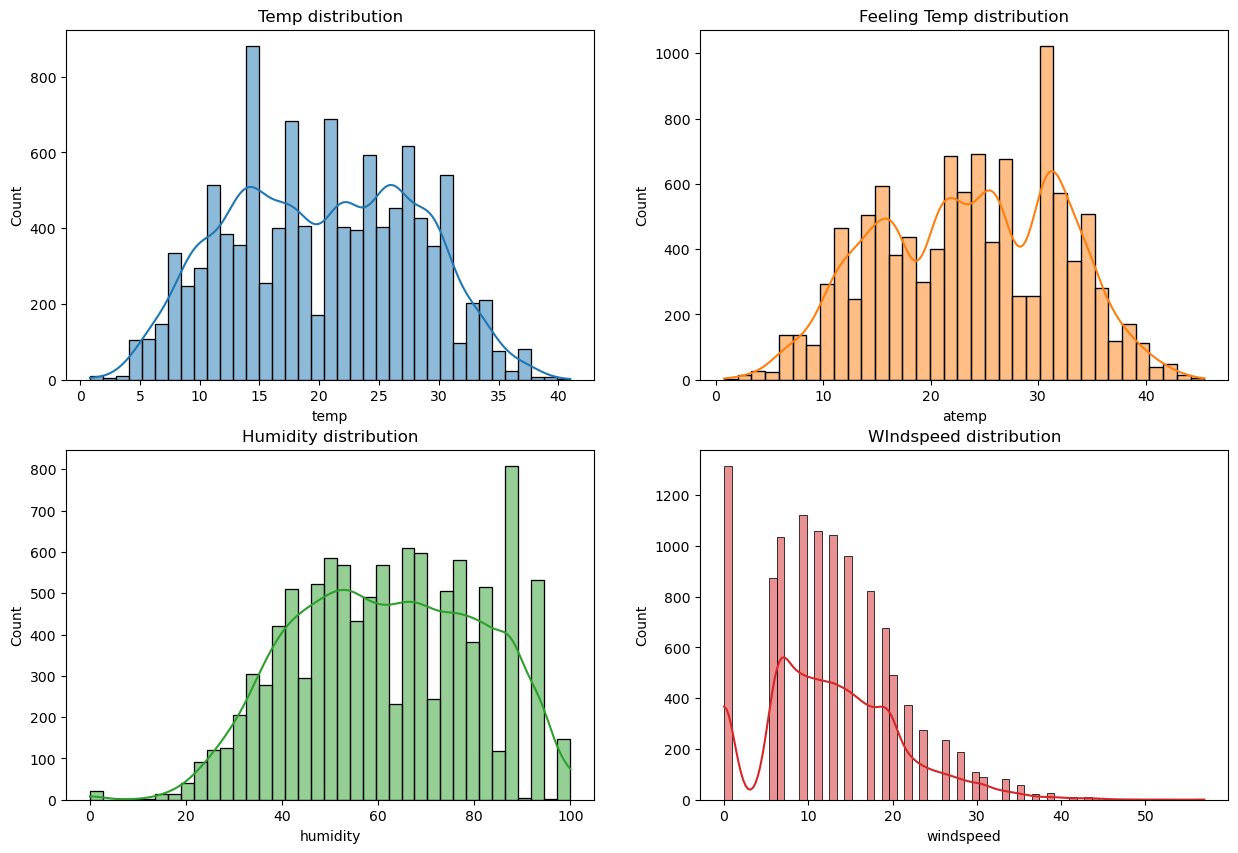

In [15]:
def plot_4b():
    # df = data.groupby(by='weather')['count'].sum().sort_index(ascending=True).reset_index()
    # df['weather'] = df['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light snow/rain', 4: 'Heavy snow/rain'})

    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.histplot(data['temp'], kde=True, color='C0')
    plt.title('Temp distribution')

    plt.subplot(2,2,2)
    sns.histplot(data['atemp'], kde=True, color='C1')
    plt.title('Feeling Temp distribution')

    plt.subplot(2,2,3)
    sns.histplot(data['humidity'], kde=True, color='C2')
    plt.title('Humidity distribution')

    plt.subplot(2,2,4)
    sns.histplot(data['windspeed'], kde=True, color='C3')
    plt.title('WIndspeed distribution')

plot_4b()

## Advance analysis

* Correlation
* Hypothesis testing

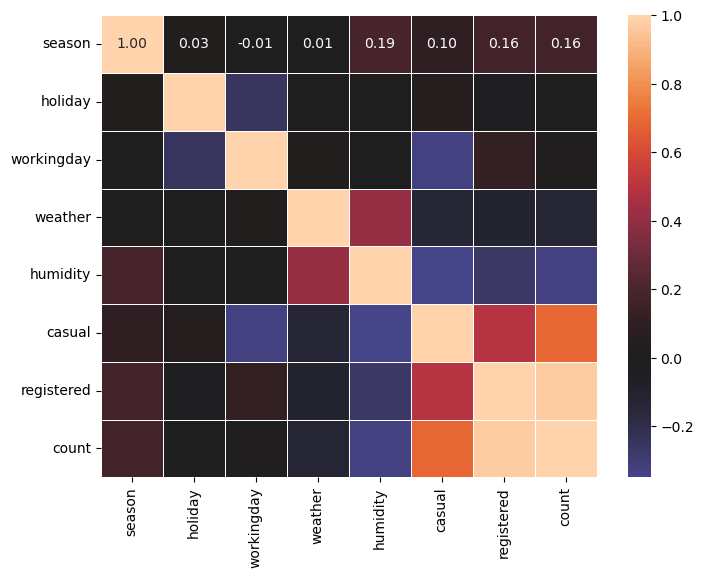

In [16]:
# Correlation
def plot_corr():
    cols = ['season', 'holiday', 'workingday', 'weather', 'humidity', 'casual','registered', 'count']
    corr_matrix = data[cols].corr()
    # df = data.select_dtypes('int')
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, center=0, fmt='.2f', linewidths=0.5, annot=True)
plot_corr()

In [32]:
# Helper function
def final_conclusion(p_value, alpha=0.05):
    conclusion = "Reject Null Hypothesis" if p_value<alpha else "Fail to reject Null Hypothesis"
    print("Final conclusion is : \n" + conclusion + f' at {alpha*100}% significance level')

## Test 1 : 
Aim : Test whether there is significant difference between no. of bike rides (count) on Weekend and Weekdays

* $H_0$ : There is no significance difference between no. of bike rides on weekend and weekdays
* $H_a$ : There is a significance difference between no. of bike rides on weekend and weekdays
* Significance level $\alpha$: 5%
* Type of test used : **2 Sample Independent T-Test**
    * Because we have only 2 categories (i.e. Workingday = 0 or 1)

In [33]:
from scipy.stats import ttest_ind

def test_1():
    count_weekend = data[data['workingday']==0]['count']
    count_weekday = data[data['workingday']==1]['count']
    test_stat, p_value = ttest_ind(count_weekend, count_weekday)
    print(f"Statistic : {test_stat}, \nP_value is : {p_value}")

    final_conclusion(p_value)

test_1()

Statistic : -1.2096277376026694, 
P_value is : 0.22644804226361348
Final conclusion is : 
Fail to reject Null Hypothesis at 5.0% significance level


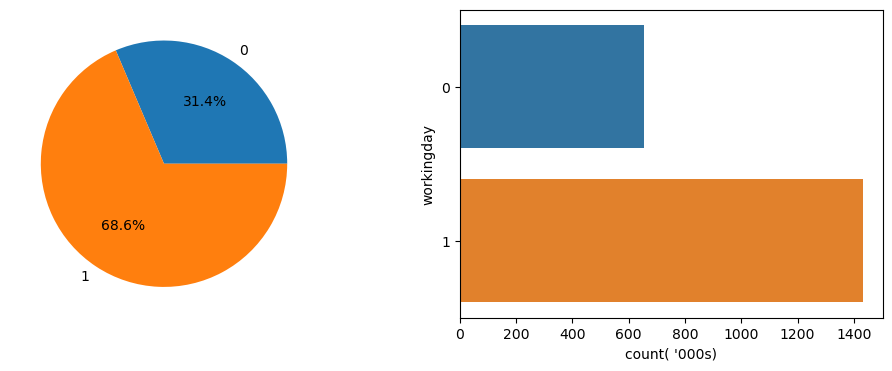

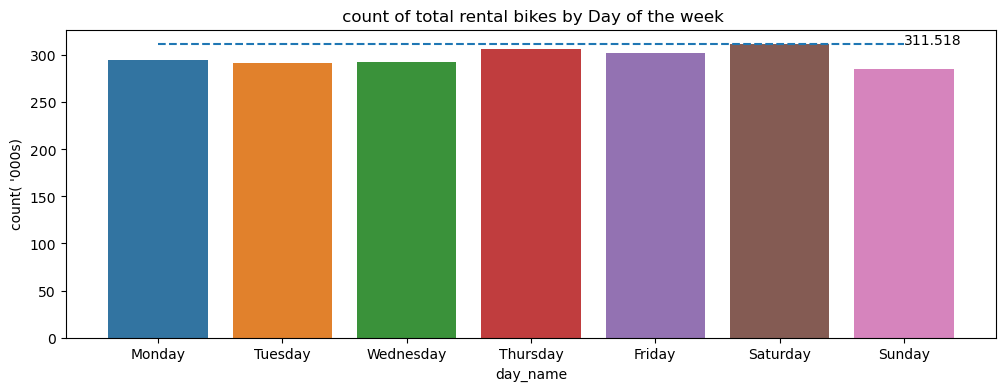

In [78]:
plot_3b()

From the above test , we conclude that there is no difference in number of bike rides on weekend and weekdays.
* Looking at the bike ride solely on the weekend and week days might lead one to believe that there is a relation between bike booking and weekday/weekend.
* Looking at the bike ride on individual day actually shows a very different picture.
    * The most number of bike rides have been observed on saturday itsef.
    * This is quite interesting because its counter-intutive to the weekedn/weekday distribution.
        * The main reason is weekend consists of just 2 days whereas weekday consist of 5 days, so the skew is definitely expected.

**Let's also see whether there is difference in demand across days of the week**

## Test 1a : 
Aim : Test whether there is significant difference between no. of bike rides across days of the week

* $H_0$ : There is no significance difference between no. of bike rides across days of the week
* $H_a$ : There is a significance difference between no. of bike rides across days of the week
* Significance level $\alpha$: 5%
* Type of test used : **One-Way ANOVA**
    * Because we have more than 2 categories (i.e. 7 days of the week)

In [89]:
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm

# Test for equal variance using Levenes test
test_stat, p_value = levene(data[data['day_name']=='Monday'].groupby('date')['count'].sum(),
                            data[data['day_name']=='Tuesday'].groupby('date')['count'].sum(),
                            data[data['day_name']=='Wednesday'].groupby('date')['count'].sum(),
                            data[data['day_name']=='Thursday'].groupby('date')['count'].sum(),
                            data[data['day_name']=='Friday'].groupby('date')['count'].sum(),
                            data[data['day_name']=='Saturday'].groupby('date')['count'].sum(),
                            data[data['day_name']=='Sunday'].groupby('date')['count'].sum())

print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

Statistic : 1.241405930658452, 
P_value is : 0.28373275127365344
Final conclusion is : 
Fail to reject Null Hypothesis at 5.0% significance level


The above test confirms that demand is different across different days of the week.

## Test 2 : 
Aim : Test whether bicycle demand is same for different weather or not

* $H_0$ : Bicycle demand is same across all weathers
* $H_a$ : Bicycle demand is not same across all weathers
* Significance level $\alpha$: 5%
* Type of test used : **One-Way ANOVA**
    * Because we have more than 2 categories (i.e. weather = 1, 2, 3, 4)


Assumptions check for ANOVA
* Normality - Shapiro Wilnk test, QQ plot
* Equal variance across groups : Levenes test


Weather <br>
1: Clear, Few clouds, partly cloudy, partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>


In [28]:
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm

#### QQ Plot (checking for normality)

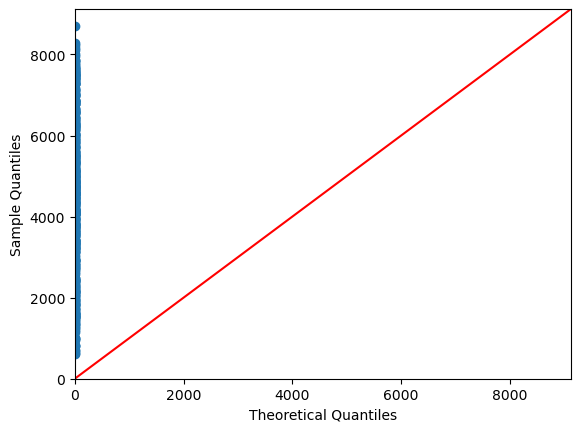

In [52]:
# Test for normality using QQ plot
sm.qqplot(data.groupby('date')['count'].sum(), line='45');

#### Shapiro Wilnk test for normality : 
Aim : To test whether data is normally distributed or not.

* $H_0$ : Data is normally distributed
* $H_a$ : Data is not normally distributed
* Significance level $\alpha$: 5%

In [50]:
# Test for normality using Shapiro-Wilnk test
test_stat, p_value = shapiro(data.groupby('date')['count'].sum())
print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

Statistic : 0.9810425043106079, 
P_value is : 1.1342259313096292e-05
Final conclusion is : 
Reject Null Hypothesis at 5.0% significance level


#### Levene test for equality of variance acorss groups (weather): 
Aim : To test whether variance is same across groups or not.

* $H_0$ : Variance is same across groups
* $H_a$ : Variance is not same acorss groups.
* Significance level $\alpha$: 5%

In [51]:
# Test for equal variance using Levenes test
test_stat, p_value = levene(data[data['weather']==1].groupby('date')['count'].sum(),
                            data[data['weather']==2].groupby('date')['count'].sum(),
                            data[data['weather']==3].groupby('date')['count'].sum(),
                            data[data['weather']==4].groupby('date')['count'].sum())

print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

Statistic : 93.49157395215164, 
P_value is : 4.1128903963643887e-53
Final conclusion is : 
Reject Null Hypothesis at 5.0% significance level


Since the data is not normnally distributed and nor the variance is not same across groups (i.e. different weathers), we cannot use One-Way ANOVA here.

Lets plot histogram and check keutosis and skewness value, and see if the distribution really seems to be non normally distributred or not.

Kurtosis is : -0.7763921344589151
Skewness is : -0.059268310603639726


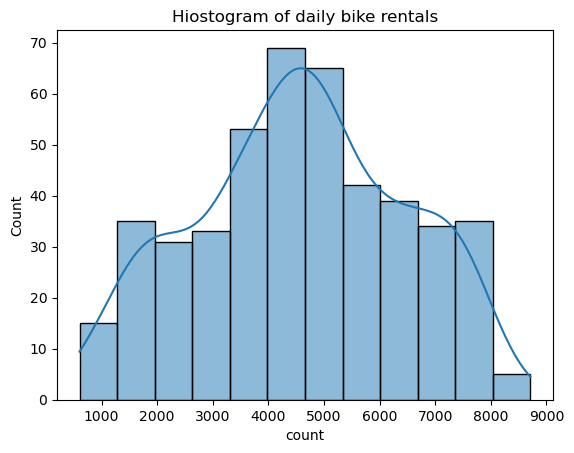

In [71]:
sns.histplot(data = data.groupby('date')['count'].sum(), kde=True)
plt.title('Hiostogram of daily bike rentals')

print('Kurtosis is :', data.groupby('date')['count'].sum().kurtosis())
print('Skewness is :', data.groupby('date')['count'].sum().skew())

In [72]:
# implementing ONE-WAY ANOVA
test_stat, p_value = f_oneway(data[data['weather']==1].groupby('date')['count'].sum(),
                              data[data['weather']==2].groupby('date')['count'].sum(),
                              data[data['weather']==3].groupby('date')['count'].sum(),
                              data[data['weather']==4].groupby('date')['count'].sum())

print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

Statistic : 163.65974098613603, 
P_value is : 9.71529956995491e-86
Final conclusion is : 
Reject Null Hypothesis at 5.0% significance level


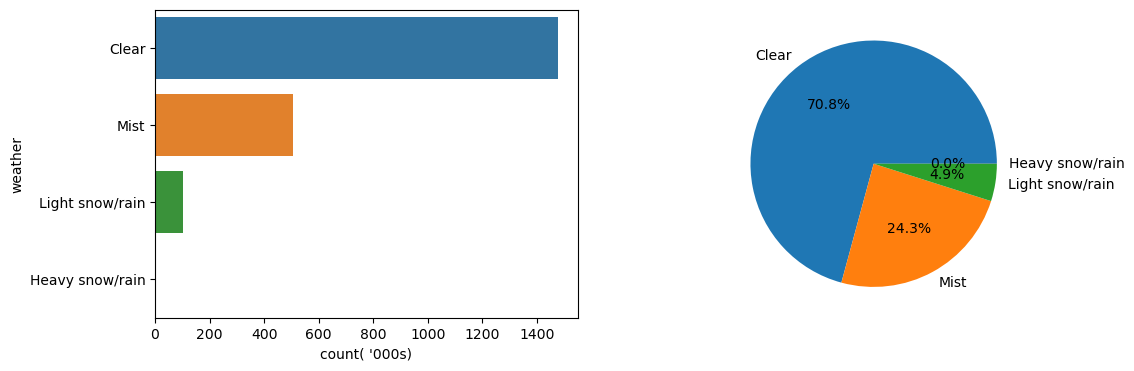

In [77]:
plot_4a()

From the above test , we conclude that Bicycle demand is not same across all weathers.
* The chart also shows the same.
    * Demand is zero during the rainy/snowing weather, which is intuitive.
    * And maximum demand is seen during a clear weather.

## Test 3 : 
Aim : Test whether bicycle demand is same for different seasons or not

* $H_0$ : Bicycle demand is same across all seasons
* $H_a$ : Bicycle demand is not same across all seasons
* Significance level $\alpha$: 5%
* Type of test used : **One-Way ANOVA**
    * Because we have more than 2 categories (i.e. seasons = 1, 2, 3, 4)


Assumptions check for ANOVA
* Normality - Shapiro Wilnk test, QQ plot
* Equal variance across groups : Levene test


Seasons <br>
1: Spring<br>
2: Summer<br>
3: Fall<br>
4: Winter<br>

#### QQ plot (checking for normality)

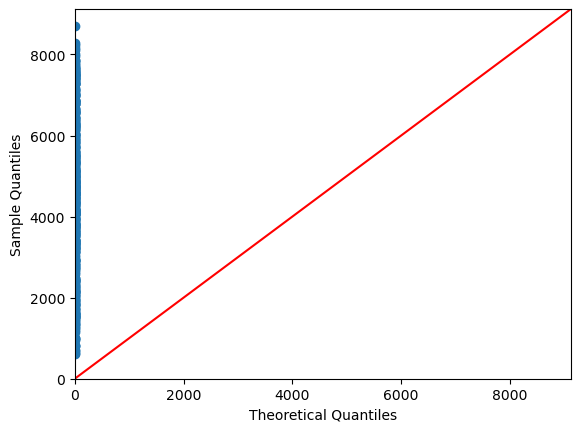

In [53]:
# Test for normality using QQ plot
sm.qqplot(data.groupby('date')['count'].sum(), line='45');

#### Shapiro Wilnk test for normality : 
Aim : To test whether data is normally distributed or not.

* $H_0$ : Data is normally distributed
* $H_a$ : Data is not normally distributed
* Significance level $\alpha$: 5%

In [54]:
# Test for normality using Shapiro-Wilnk test
test_stat, p_value = shapiro(data.groupby('date')['count'].sum())
print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

Statistic : 0.9810425043106079, 
P_value is : 1.1342259313096292e-05
Final conclusion is : 
Reject Null Hypothesis at 5.0% significance level


#### Levene test for equality of variance acorss groups (season): 
Aim : To test whether variance is same across groups or not.

* $H_0$ : Variance is same across (different season) groups
* $H_a$ : Variance is not same acorss (different season) groups.
* Significance level $\alpha$: 5%|

In [55]:
# Test for equal variance using Levenes test
test_stat, p_value = levene(data[data['season']==1].groupby('date')['count'].sum(),
                            data[data['season']==2].groupby('date')['count'].sum(),
                            data[data['season']==3].groupby('date')['count'].sum(),
                            data[data['season']==4].groupby('date')['count'].sum())

print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

Statistic : 1.5071252673249398, 
P_value is : 0.21194448921499898
Final conclusion is : 
Fail to reject Null Hypothesis at 5.0% significance level


We can see the data is not normnally distributed and but the variance is same across groups (i.e. different weathers).

Lets plot histogram and check keutosis and skewness value, and see if the distribution really seems to be non normally distributred or not.

Kurtosis is : -0.7763921344589151
Skewness is : -0.059268310603639726


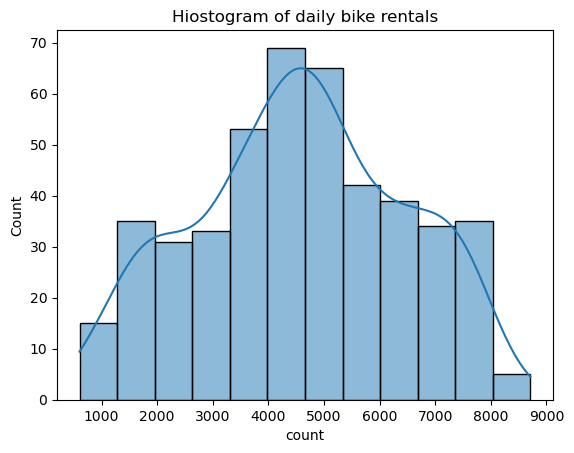

In [73]:
sns.histplot(data = data.groupby('date')['count'].sum(), kde=True)
plt.title('Hiostogram of daily bike rentals')

print('Kurtosis is :', data.groupby('date')['count'].sum().kurtosis())
print('Skewness is :', data.groupby('date')['count'].sum().skew())

In [74]:
# implementing ONE-WAY ANOVA
test_stat, p_value = f_oneway(data[data['season']==1].groupby('date')['count'].sum(),
                              data[data['season']==2].groupby('date')['count'].sum(),
                              data[data['season']==3].groupby('date')['count'].sum(),
                              data[data['season']==4].groupby('date')['count'].sum())

print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

Statistic : 80.0504789788067, 
P_value is : 1.506580502991204e-41
Final conclusion is : 
Reject Null Hypothesis at 5.0% significance level


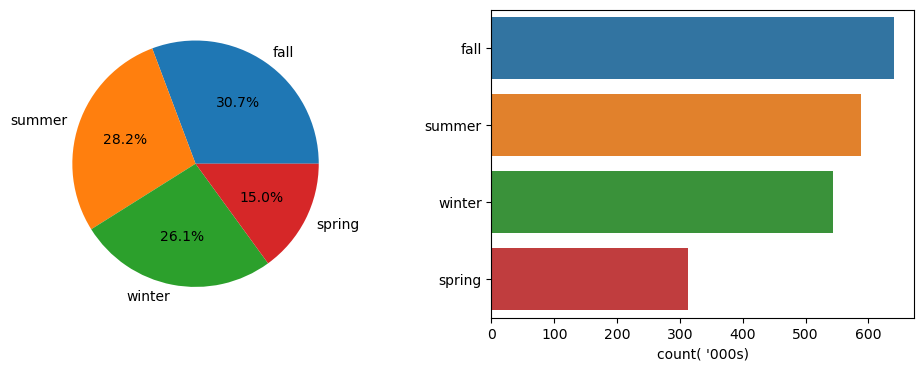

In [76]:
plot_2()

From the above test , we conclude that Bicycle demand is not same across all seasons.
* The below chart also shows the same inference.
    * We notice that the demand is the lowest in the Spring compared to other seasons.
    * Max demand is seen during the Fall and Summer

Lets also test whether the demand is different across different months or not.


## Test 3a :

Aim : Test whether bicycle demand is same for different months or not

* $H_0$ : Bicycle demand is same across all months
* $H_a$ : Bicycle demand is not same across all months
* Significance level $\alpha$: 5%
* Type of test used : **One-Way ANOVA**
    * Because we have more than 2 categories (i.e. 12 months)

#### Levene test for equality of variance acorss groups (months): 
Aim : To test whether variance is same across groups or not.

* $H_0$ : Variance is same across (different months) groups
* $H_a$ : Variance is not same acorss (different months) groups.
* Significance level $\alpha$: 5%

In [85]:
# Test for equal variance using Levenes test
test_stat, p_value = levene(data[data['month']==1].groupby('date')['count'].sum(),
                            data[data['month']==2].groupby('date')['count'].sum(),
                            data[data['month']==3].groupby('date')['count'].sum(),
                            data[data['month']==4].groupby('date')['count'].sum(),
                            data[data['month']==5].groupby('date')['count'].sum(),
                            data[data['month']==6].groupby('date')['count'].sum(),
                            data[data['month']==7].groupby('date')['count'].sum(),
                            data[data['month']==8].groupby('date')['count'].sum(),
                            data[data['month']==9].groupby('date')['count'].sum(),
                            data[data['month']==10].groupby('date')['count'].sum(),
                            data[data['month']==11].groupby('date')['count'].sum(),
                            data[data['month']==12].groupby('date')['count'].sum())

print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

Statistic : 4.274093352560551, 
P_value is : 4.59079060752102e-06
Final conclusion is : 
Reject Null Hypothesis at 5.0% significance level


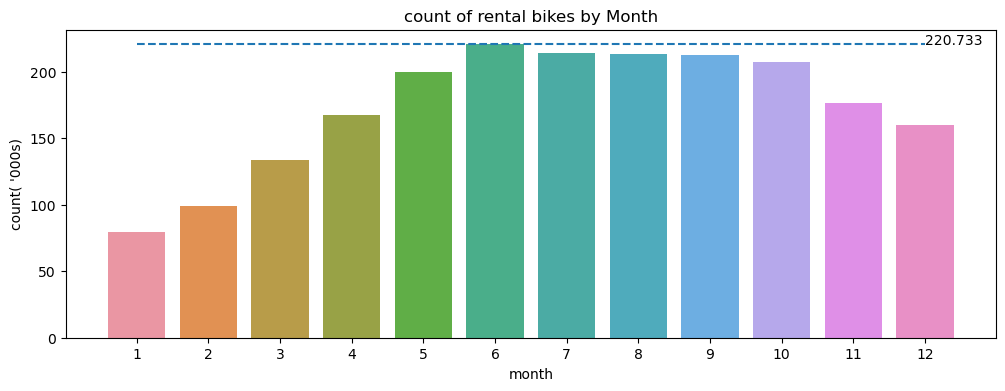

In [86]:
plot_3c()

From the above test , we conclude that Bicycle demand is not same across all months either.
* Looking at the above chart
    * Generally, the demand for bikes is less in the first 6 months, with max demand peaking in June
    * Although in second half, the demand remains constant but a drop in demand is quite evident in November and December.
        * This trend continues till Jan , with lowest seen during January.
        * The possible reason could be weather, as seen above as weel (demand across seasons), Nov-Dec-Jan-Feb are coldest and hence lower demand.

## Test 4 : 
Aim : Test if Weather conditions are different during different seasons or not

* $H_0$ : Weather conditions are same during different seasons
* $H_a$ : Weather conditions are not same during different seasons
* Significance level $\alpha$: 5%
* Type of test used : **Chi-Squared test of independence**
    * Because we are comparing a categorical against a categorical variable. (Weather and Seasons)


Weather <br>
1: Clear, Few clouds, partly cloudy, partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>


Seasons <br>
1: Spring<br>
2: Summer<br>
3: Fall<br>
4: Winter<br>



In [75]:
from scipy.stats import chi2_contingency
print(pd.crosstab(index=data['weather'], columns=data['season']))
test_stat, p_value, df, exp_freq = chi2_contingency(pd.crosstab(index=data['weather'], columns=data['season']), )
print(f"Statistic : {test_stat}, \nP_value is : {p_value}")
final_conclusion(p_value)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0
Statistic : 49.15865559689363, 
P_value is : 1.5499250736864862e-07
Final conclusion is : 
Reject Null Hypothesis at 5.0% significance level


Based on the above test, we reject null hypothesis. Which means that weather conditions are not same during different seasons.
* Looking at this intutively, this was expected as the chances of having a clear day in a Winter season, or Heavy rain in summer is unlikely.


# Final Conclusions : 

1. There is no difference in number of bike rides (demand) on weekend and weekdays
    * But, the demand is different across different days of the week.
    * The most number of bike rides have been observed on saturday itsef.
    * This is counter-intutive to the weekedn/weekday distribution.
        * The main reason is weekend consists of just 2 days whereas weekday consist of 5 days, so the skew is definitely expected.

2. The Demand in bikes is different across weathers 
    * Demand is zero during the rainy/snowing weather, which is intuitive.
    * And maximum demand is seen during a clear weather.


3. The demand is also different across seasons
    * The demand is the lowest in the Spring compared to other seasons.
    * Maximum demand is seen during the Fall and Summer

4. Looking at the demand across months, we also conclude that Bicycle demand is not same across all months either.
    * Generally, the demand for bikes is less in the first 6 months, with max demand peaking in June
    * Demand remains constant in second half of the year but a drop is quite evident in November and December.
        * This trend continues till Jan , with lowest seen during January.
